<a href="https://colab.research.google.com/github/FoleyLab/FoleyLab.github.io/blob/master/notebooks/Linear_Variational_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Variational Principle
This notebook demonstrates the Linear Variational Method to the particle in a box of length $L = 10$ atomic units 
with a delta function potential centered at $x_0=5$ atomic units.  This notebook will attempt to show graphically why inclusion of excited-states of the ordinary particle in a box system can improve the energy of the particle in a box with a delta potential.  

# The approach
We will optimize
the trial wavefunction given by 
\begin{equation}
\Phi(x) = \sum_{n=1}^N c_n \psi_n(x)
\end{equation}
where the coefficients $c_n$ are real numbers
and $\psi_n(x)$ are the energy eigenfunctions of the particle in a box with no potential:
\begin{equation}
\psi_n(x) = \sqrt{\frac{2}{L} } {\rm sin}\left(\frac{n \pi x}{L} \right).
\end{equation}

We will seek to minimize the energy functional through the expansion coefficients, where the
energy functional can be written as
\begin{equation}
E[\Phi(x)] = \frac{\int_0^{L} \Phi^* (x) \: \hat{H} \: \Phi(x) dx }{\int_0^{L} \Phi^* (x) \: \Phi(x) dx }.
\end{equation}


The Hamiltonian operator in the box is given by 
\begin{equation}
\hat{H} = -\frac{\hbar^2}{2M} \frac{d^2}{dx^2} + \delta(x-x_0);
\end{equation}
in natural units, $\hbar$ and the electron mass $M$ are equal to 1.

$E[\Phi(x)]$ can be expanded as
\begin{equation}
E[\Phi(x)] \sum_{n=1}^N \sum_{m=1}^N c_n c_m S_{nm} = \sum_{n=1}^N \sum_{m=1}^N c_n c_m H_{nm}
\end{equation}
where 
\begin{equation}
S_{nm} = \int_0^L \psi_n(x) \psi_m(x) dx = \delta_{nm}
\end{equation}
and
\begin{equation}
H_{nm} = \int_0^L \psi_n(x) \hat{H} \psi_m(x) dx. 
\end{equation}

Solving this equation can be seen to be identical to diagonalizing the matrix ${\bf H}$, whose elements are $H_{nm}$ to obtain energy eigenvalues $E$ and eigenvectors ${\bf c}$.  The lowest eigenvalue corresponds to the variational ground state energy, and the corresponding eigenvector can be
used to expand the variational ground state wavefunction through Equation 1.

# Computing elements of the matrix
We can work out a general expression for the integrals $H_{nm}$:
\begin{equation}
H_{nm} = \frac{\hbar^2 \pi^2 n^2}{2 M L^2} \delta_{nm} + \frac{2}{L} {\rm sin}\left( \frac{n \pi x_0}{L} \right) {\rm sin}\left( \frac{m\pi x_0}{L} \right).
\end{equation}


Import NumPy and PyPlot libraries

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal


Write a function that computes the matrix elements $H_{ij}$ given quantum numbers $i$ and $j$, length of the box $L$, and location of the delta function $x_0$.  We will assume atomic units where $\hbar = 1$ and $M = 1$.

In [ ]:
### Function to return integrals involving Hamiltonian and basis functions
def H_nm(n, m, L, x0):
  ''' We will use the expression for Hnm along with given values of L and x_0 
      to compute the elements of the Hamiltonian matrix '''
  if n==m:
    ham_int = np.pi**2 * m**2/(2 * L**2) + (2/L) * np.sin(n*np.pi*x0/L) * np.sin(m*np.pi*x0/L)
  else:
    ham_int = (2/L) * np.sin(n*np.pi*x0/L) * np.sin(m*np.pi*x0/L)
    
  return ham_int

def psi_n(n, L, x):
  return np.sqrt(2/L) * np.sin(n * np.pi * x/L)

Next we will create a numpy array called $H_{mat}$ that can be used to store the Hamiltonian matrix elements.  We can start by considering a trial wavefunction that is an expansion of the first 3 PIB energy eigenfunctions, so our Hamiltonian in this case should be a 3x3 numpy array.

In [ ]:
dim = 3
H_mat = np.zeros((dim,dim))

You can use two nested $for$ loops along with your $H_{ij}$ function to fill out the values of this matrix.  Note that the indices for numpy arrays start from zero while the quantum numbers for our system start from 1, so we must offset our quantum numbers by +1 relative to our numpy array indices.

In [ ]:
### define L to be 10 and x0 to be 5
L = 10
x0 = 5
### loop over indices of the basis you are expanding in
### and compute and store the corresponding Hamiltonian matrix elements
for n in range(0,dim):
    for m in range(0,dim):
        H_mat[n,m] = H_nm(n+1, m+1, L, x0)

### Print the resulting Hamiltonian matrix
print(H_mat)

[[ 2.49348022e-01  2.44929360e-17 -2.00000000e-01]
 [ 2.44929360e-17  1.97392088e-01 -2.44929360e-17]
 [-2.00000000e-01 -2.44929360e-17  6.44132198e-01]]


In [ ]:
### compute eigenvalues and eigenvectors of H_mat
### store eigenvalues to E_vals and eigenvectors to c
E_vals, c = np.linalg.eig(H_mat)

### The eigenvalues will not necessarily be sorted from lowest-to-highest; this step will sort them!
idx = E_vals.argsort()[::1]
E_vals = E_vals[idx]
c = c[:,idx]

### print lowest eigenvalues corresponding to the 
### variational estimate of the ground state energy
print("Ground state energy with potential is approximately ",E_vals[0])
print("Ground state energy of PIB is ",np.pi**2/(200))

Ground state energy with potential is approximately  0.16573541893898724
Ground state energy of PIB is  0.04934802200544679


Let's plot the first few eigenstates of the ordinary PIB against the potential:

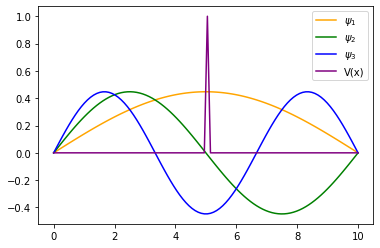

In [ ]:
### array of x-values
x = np.linspace(0,L,100)
### first 3 energy eigenstates of ordinary PIB
psi_1 = psi_n(1, L, x)
psi_2 = psi_n(2, L, x)
psi_3 = psi_n(3, L, x)
Vx = signal.unit_impulse(100,50)

plt.plot(x, psi_1, 'orange', label='$\psi_1$')
plt.plot(x, psi_2, 'green', label='$\psi_2$')
plt.plot(x, psi_3, 'blue', label='$\psi_3$')
plt.plot(x, Vx, 'purple', label='V(x)')
plt.legend()
plt.show()

Now let's plot the probability density associated with the first three eigenstates along with the probability density of the variational solution against the potential:

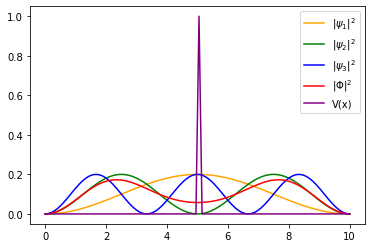

In [ ]:
Phi = c[0,0]*psi_1 + c[1,0]*psi_2 + c[2,0]*psi_3


plt.plot(x, psi_1*psi_1, 'orange', label='$|\psi_1|^2$')
plt.plot(x, psi_2*psi_2, 'green', label='$|\psi_2|^2$')
plt.plot(x, psi_3*psi_3, 'blue', label='$|\psi_3|^2$')
plt.plot(x, Phi*Phi, 'red', label='$|\Phi|^2$')
plt.plot(x, Vx, 'purple', label='V(x)')
plt.legend()
plt.show()

### Questions To Think About!
1.  Is the energy you calculated above higher or lower than the ground state energy of the ordinary particle in a box system (without the delta function potential)?
Answer:  The energy calculated to approximate the ground state energy of the PIB + Potential using the linear variational method is higher than the true PIB ground state energy (0.165 atomic units for the PIB + Potential compared to 0.0493 atomic units for the ordinary PIB).  The addition of the potential should increase the ground state energy because it is repulsive.
2.  Why do you think mixing in functions that correspond to excited states in the ordinary particle in a box system actually helped to improve (i.e. lower) your energy in the system with the delta function potential?
Answer:  Certain excited states (all states with even $n$) go to zero at the center of the box, and the repulsive potential is localized to the center of the box.  Therefore, all excited states with even $n$ will move electron density away from the repulsive potential, which can potentially loer the energy.
3.  Increase the number of basis functions to 6 (so that ${\bf H}$ is a 6x6 matrix and ${\bf c}$ is a vector with 6 entries) and repeat your calculation of the variational estimate of the ground state energy.  Does the energy improve (lower) compared to what it was when 3 basis functions were used?
Answer:  Yes, the energy improves.  With 3 basis functions, the ground state energy is approximated to be 0.165 atomic units and with 6 basis functions, the ground state energy is approximated to be 0.155 atomic units.  The added flexibility of these additional basis functions (specifically more basis functions with $n$ even) allows greater flexibility in optimizing a wavefunction that describes an electron effectively avoiding the repulsive potential in the center of the box.